In [1]:
p_grid <- seq(from = 0, to = 1, length.out = 1000)
prior <- rep(1, 1000)
likelihood <- dbinom(6, size = 9, prob = p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample(p_grid, prob = posterior, size = 1e4, replace = TRUE)


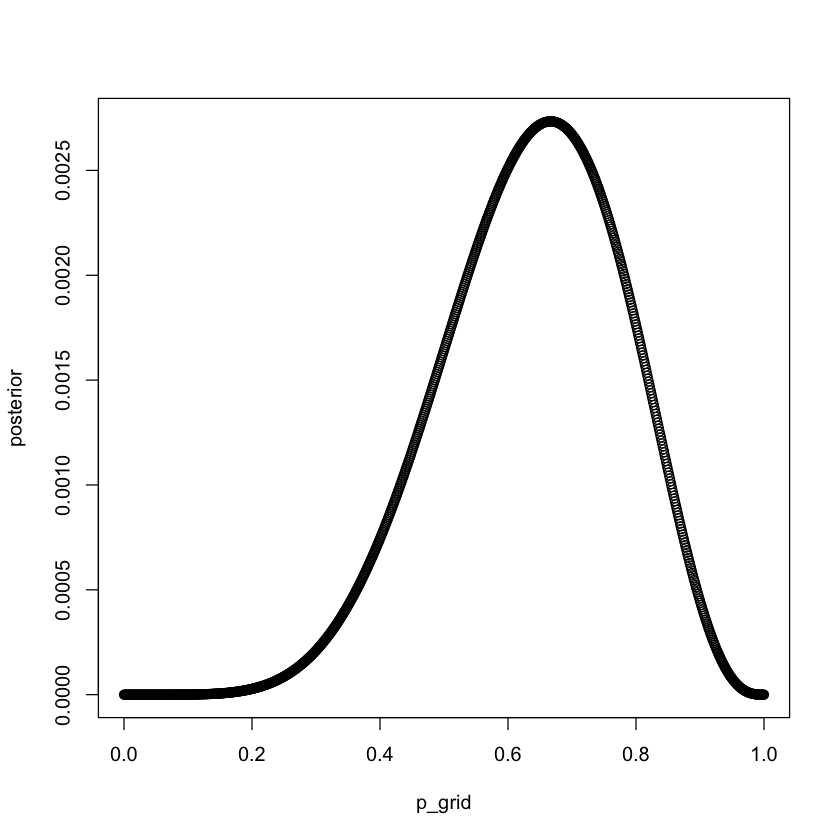

In [3]:
plot(p_grid, posterior)


In [5]:
sum(posterior[p_grid < 0.2])


[1] 0.0008560951

In [6]:
sum(posterior[p_grid > 0.8])


[1] 0.1203449

In [7]:
sum(posterior[(p_grid <= 0.8) & (p_grid >= 0.2)])


[1] 0.878799

In [9]:
tail(p_grid[cumsum(posterior) <= 0.2], 1)


[1] 0.5155155

In [10]:
head(p_grid[cumsum(posterior) >= 0.8], 1)


[1] 0.7607608

3E5


In [22]:
# narrowest interval of 66% posterior probability
# "highest density interval".
# basically check all intervals possible

lowers <- c()
uppers <- c()
for (start in 1:length(p_grid)) {
    last <- -1
    for (i in start:length(p_grid)) {
        if (sum(posterior[start:i]) > 0.66) {
            last <- i
            break
        }
    }
    if (last > 0) {
        lowers <- append(lowers, start)
        uppers <- append(uppers, last)
    }
}


In [27]:
idx <- which.min(uppers - lowers)
l_p <- p_grid[lowers[idx]]
u_p <- p_grid[uppers[idx]]

print(c(l_p, u_p))


[1] 0.5165165 0.7887888


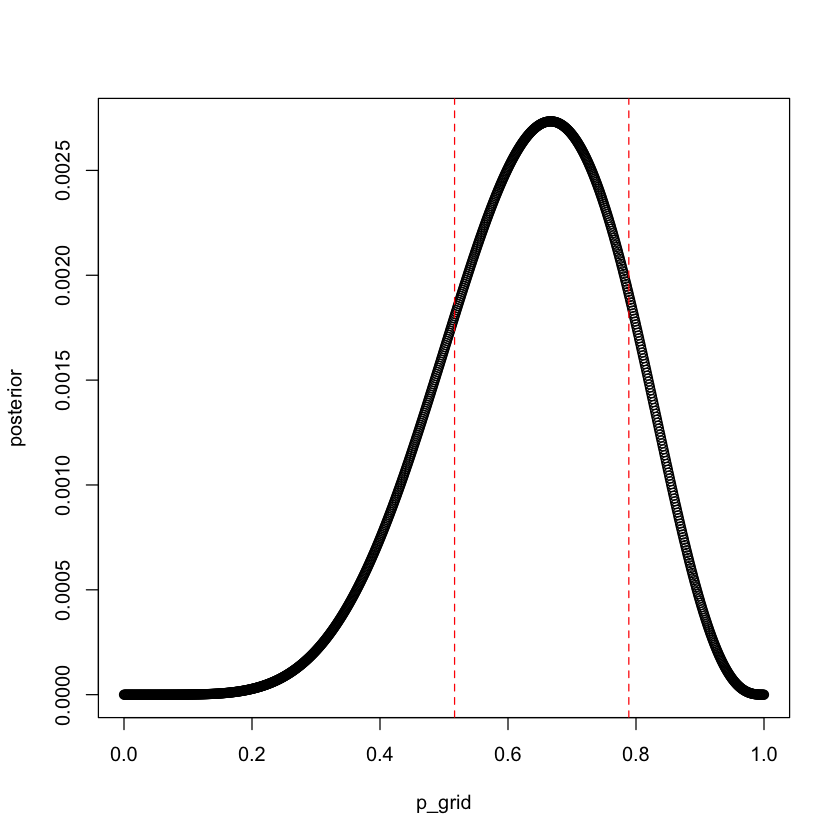

In [31]:
par(bg = "white")
plot(p_grid, posterior)
abline(v = l_p, col = "red", lty = 2)
abline(v = u_p, col = "red", lty = 2)


3E6


In [47]:
lowers <- c()
uppers <- c()
for (start in 1:length(p_grid)) {
    last <- -1
    for (i in start:length(p_grid)) {
        if (sum(posterior[start:i]) > 0.66) {
            last <- i
            break
        }
    }
    if (last > 0) {
        before_pos_prob <- sum(posterior[0:start])
        after_pos_prob <- sum(posterior[last:length(posterior)])
        if (abs(after_pos_prob - before_pos_prob) < 1e-2) {
            lowers <- append(lowers, start)
            uppers <- append(uppers, last)
        }
    }
}


In [48]:
uppers


[1] 772 773 774 775 776 776

In [51]:
print(uppers[1])


[1] 772


[1] 0.4964965 0.7717718


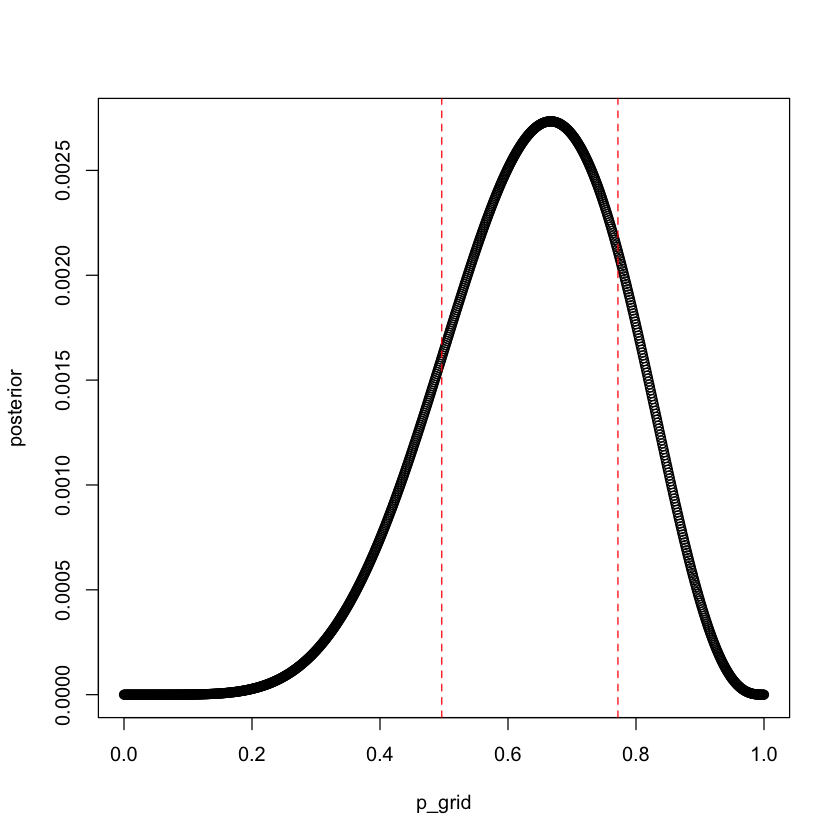

In [52]:
idx <- 1
l_p <- p_grid[lowers[idx]]
u_p <- p_grid[uppers[idx]]

print(c(l_p, u_p))

par(bg = "white")
plot(p_grid, posterior)
abline(v = l_p, col = "red", lty = 2)
abline(v = u_p, col = "red", lty = 2)


# everything i did before was wrong

the question says, use the values in `samples`


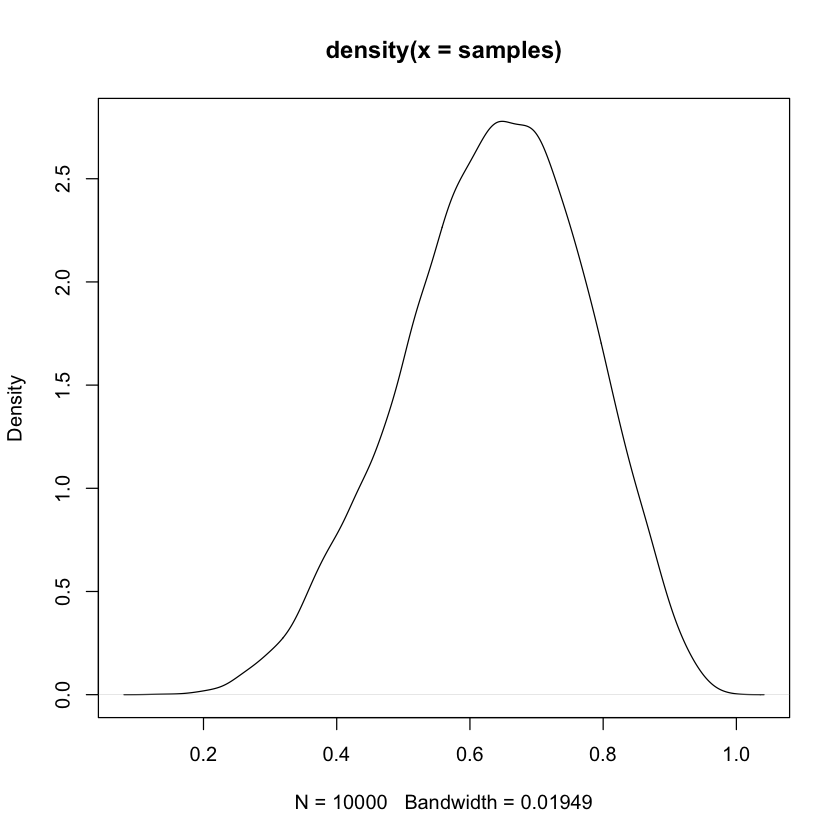

In [61]:
par(bg = "white")
plot(density(samples))


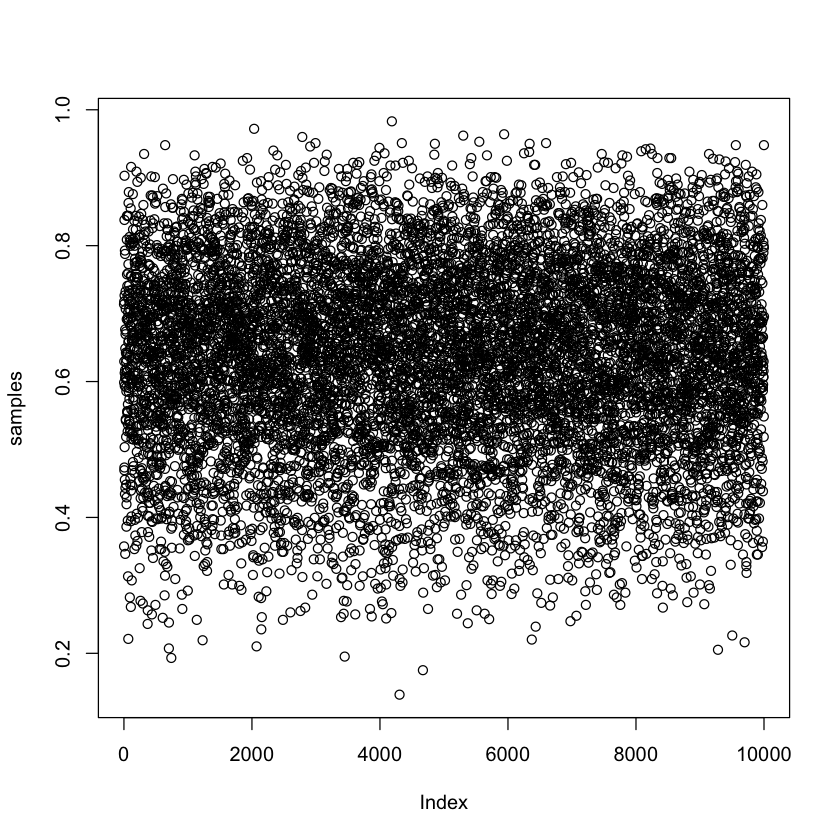

In [55]:
plot(samples)


In [57]:
length(samples)


[1] 10000

In [56]:
# 3e1
sum(samples < 0.2) / length(samples)


[1] 4e-04

In [58]:
sum(samples > 0.8) / length(samples)


[1] 0.1116

In [59]:
sum((samples < 0.8) & (samples > 0.2)) / length(samples)


[1] 0.888

In [67]:
quantile(samples, 0.2)


20% 
0.5185185

In [68]:
sum(samples < quantile(samples, 0.2)) / length((samples))


[1] 0.1998

In [70]:
quantile(samples, 0.8)


80% 
0.7557558

In [106]:
seq(1, 1000, by = 10)


[1]   1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 [19] 181 191 201 211 221 231 241 251 261 271 281 291 301 311 321 331 341 351
 [37] 361 371 381 391 401 411 421 431 441 451 461 471 481 491 501 511 521 531
 [55] 541 551 561 571 581 591 601 611 621 631 641 651 661 671 681 691 701 711
 [73] 721 731 741 751 761 771 781 791 801 811 821 831 841 851 861 871 881 891
 [91] 901 911 921 931 941 951 961 971 981 991

In [118]:
library(rethinking)


Loading required package: cmdstanr

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: posterior

Warning message:
“package ‘posterior’ was built under R version 4.3.3”
This is posterior version 1.6.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.42)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [124]:
print(HPDI(samples, prob = 0.66))


    |0.66     0.66| 
0.5085085 0.7737738 


In [126]:
help(HPDI)


HPDI                package:rethinking                 R Documentation

_C_o_n_f_i_d_e_n_c_e/_c_r_e_d_i_b_l_e _i_n_t_e_r_v_a_l_s _f_r_o_m _s_a_m_p_l_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     These functions compute highest posterior density (HPDI) and
     percentile (PI) intervals, using samples from a posterior density
     or simulated outcomes.

_U_s_a_g_e:

     HPDI( samples , prob=0.89 )
     PI( samples , prob=0.89 )
     
_A_r_g_u_m_e_n_t_s:

 samples: Vector of parameter values

    prob: interval probability mass

_D_e_t_a_i_l_s:

     Highest Posterior Density Intervals (HPDI) are calculated by
     ‘HPDinterval’ in the ‘coda’ package.

     Percentile intervals (PI) use ‘quantile’ and assign equal mass to
     each tail.

_A_u_t_h_o_r(_s):

     Richard McElreath

_S_e_e _A_l_s_o:

     ‘HPDinterval’


In [125]:
print(PI(samples, prob = 0.66))


      17%       83% 
0.5025025 0.7697698 


In [114]:
# does not work
# Calculate highest posterior density interval
lowers <- c()
uppers <- c()
for (i in seq(1, 1000, by = 1)) {
    last <- -1
    for (j in seq(i, 1000, by = 1)) {
        d <- sum(samples[(samples >= p_grid[i]) & (samples <= p_grid[j])]) / length(samples)
        if (d > 0.66) {
            print(c(p_grid[i], p_grid[j]))
            print(d)
        }
        # if (d > 0.66) {
        #     last <- j
        #     break
        # }
    }
    # if (last > 0) {
    #     lowers <- append(lowers, i)
    #     uppers <- append(uppers, last)
    # }
}


In [93]:
(uppers - lowers)[1000]


[1] NA

In [99]:
lowers


NULL

[1] 1000
[1] 1 1


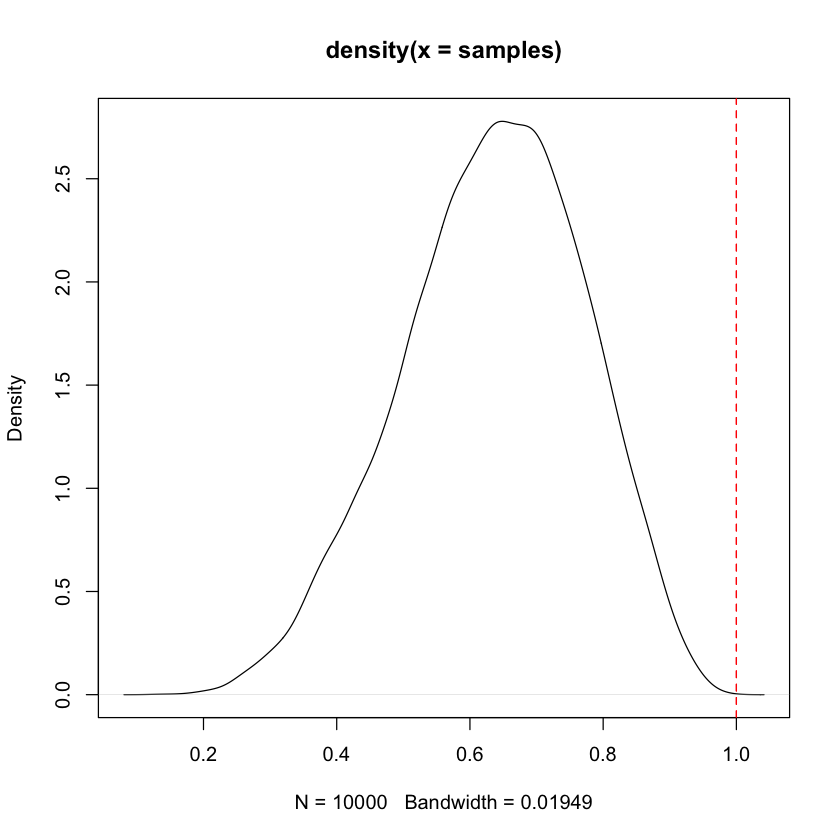

In [83]:
idx <- which.min(uppers - lowers)
print(idx)
l_p <- p_grid[lowers[idx]]
u_p <- p_grid[uppers[idx]]

print(c(l_p, u_p))

par(bg = "white")
plot(density(samples))
abline(v = l_p, col = "red", lty = 2)
abline(v = u_p, col = "red", lty = 2)
